In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_14149/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_smoothing_spline
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy 

In [3]:
ozone = pd.read_csv("../donnees/ozone_simple.txt", header=0, sep=";")

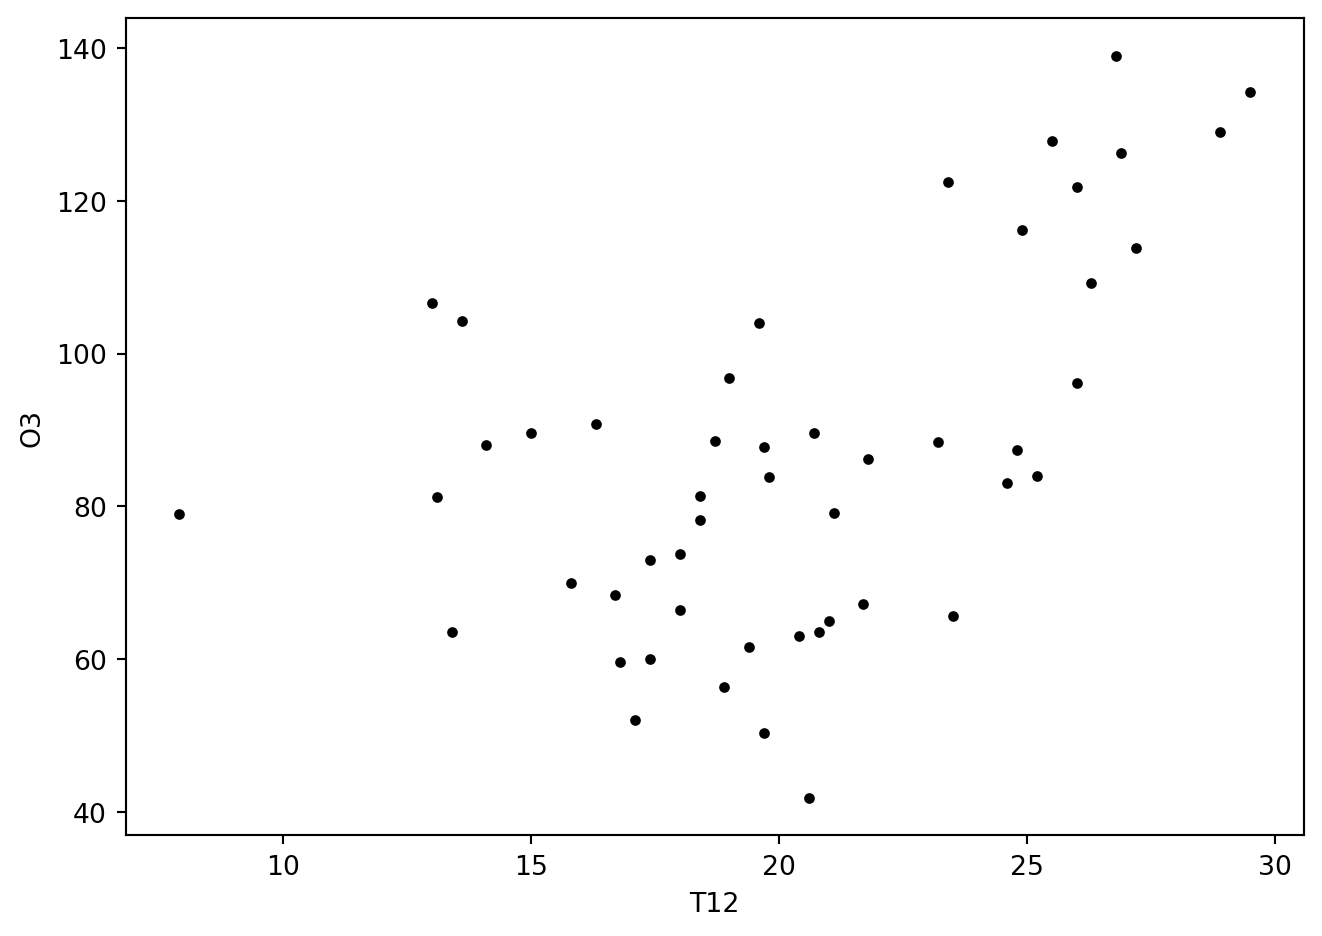

In [4]:
fig = plt.figure()
plt.plot(ozone.T12, ozone.O3, '.k')
plt.ylabel('O3')
plt.xlabel('T12')
fig.tight_layout()

In [5]:
def polyreg(donnee, d=3):
    sigmax = donnee.T12.std()
    mini = donnee.T12.min() -sigmax
    maxi = donnee.T12.max()+sigmax
    grillex = np.linspace(mini, maxi, 100)
    aprevoir = pd.DataFrame({"T12": grillex})
    formula = "O3~1"
    for deg in range(d):
        if deg>0:
            formula = formula + "+ np.power(T12," + str(deg+1) + ")"
        else:
            formula = formula + "+ T12"
    repol = smf.ols(formula, donnee).fit()
    prev = repol.predict(aprevoir)
    return {"grillex": grillex, "grilley": prev}

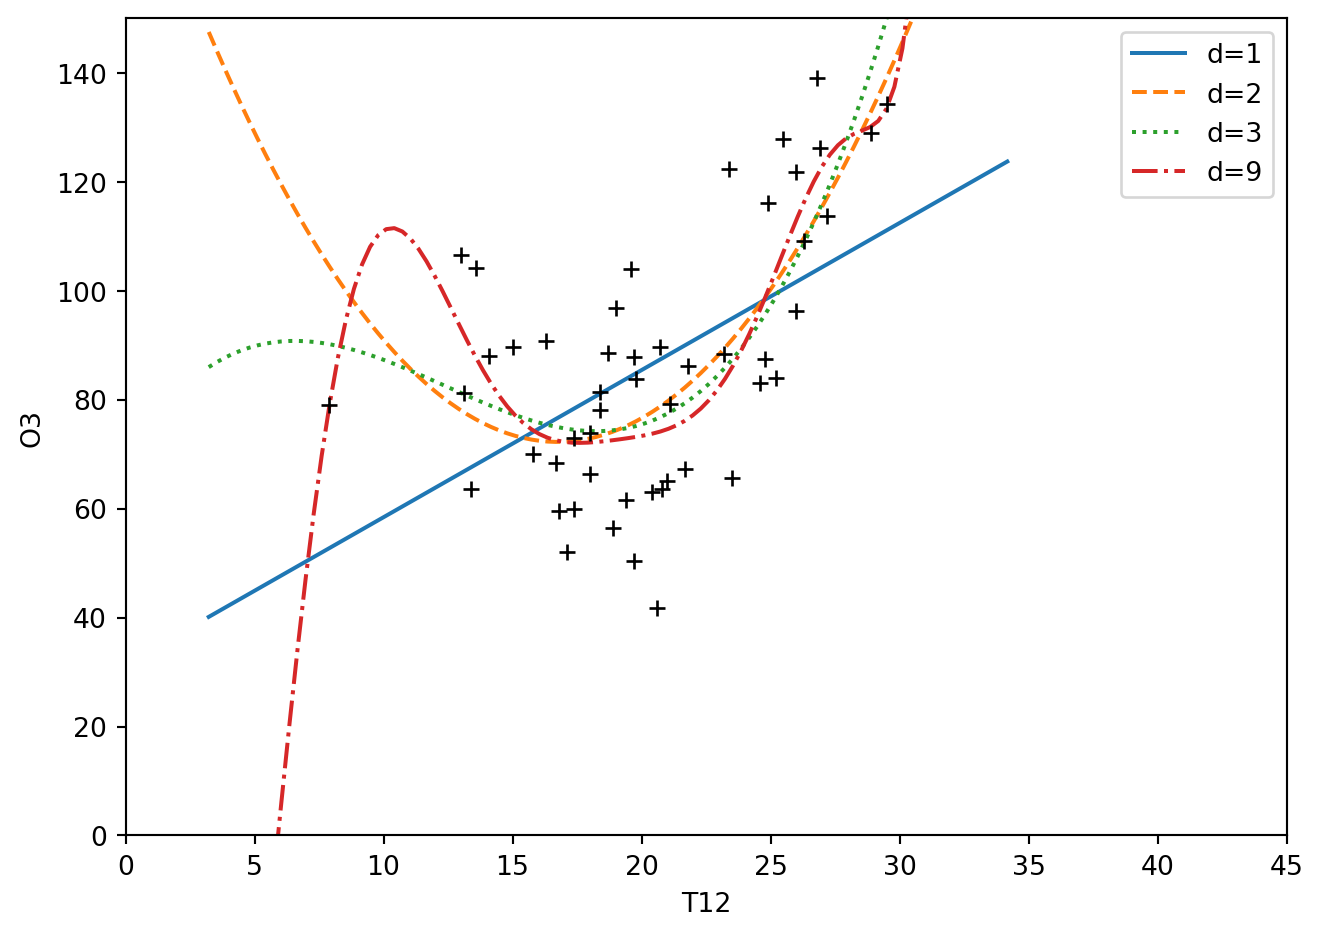

In [6]:
ligne = ['-', '--', ':', '-.']
fig, ax = plt.subplots(1, 1)
for iter, ii in enumerate([1,2,3,9]):
    tmp = polyreg(ozone, d=ii)
    ax.plot(tmp["grillex"], tmp["grilley"], ls=ligne[iter])

ax.set_xlabel("T12")
ax.set_ylabel("O3")
ax.set_xlim(0, 45)
ax.set_ylim(0, 150)
ax.legend(['d=1', 'd=2', 'd=3', 'd=9'])
ax.plot(ozone.T12, ozone.O3, "k+")
fig.tight_layout()

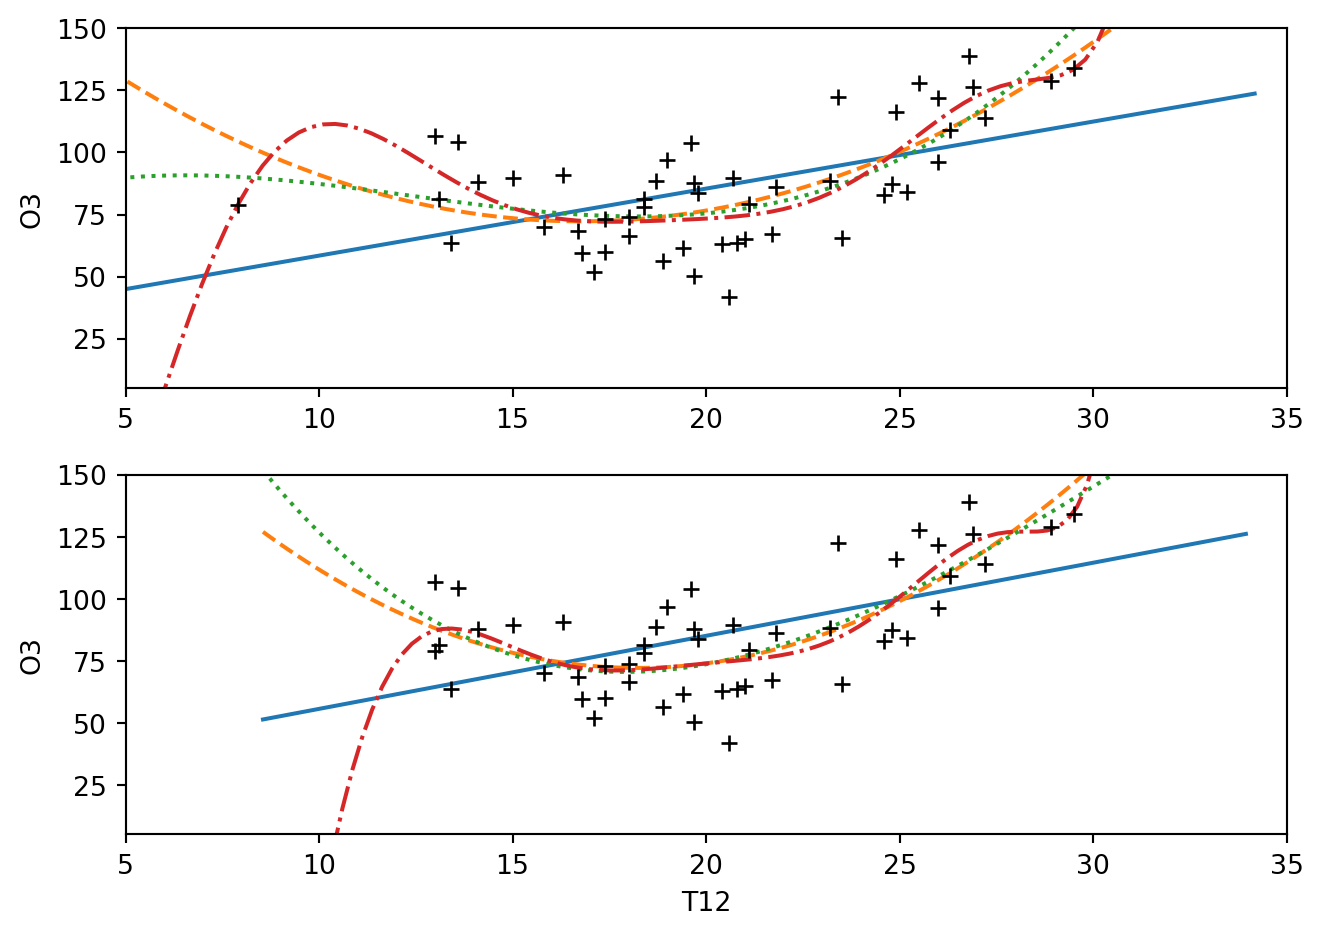

In [7]:
oz = ozone.copy()
oz.loc[oz.T12==7.9,"T12"] = 13
ligne = ['-', '--', ':', '-.']
fig, (ax1, ax2) = plt.subplots(2, 1)
for iter, ii in enumerate([1,2,3,9]):
    tmp = polyreg(ozone, d=ii)
    ax1.plot(tmp["grillex"], tmp["grilley"], ls=ligne[iter])

ax1.set_ylabel("O3")
ax1.set_xlim(5,35)
ax1.set_ylim(5, 150)
ax1.plot(ozone.T12, ozone.O3, "k+")
for iter, ii in enumerate([1,2,3,9]):
    tmp = polyreg(oz, d=ii)
    ax2.plot(tmp["grillex"], tmp["grilley"], ls=ligne[iter])

ax2.set_xlabel("T12")
ax2.set_ylabel("O3")
ax2.set_xlim(5,35)
ax2.set_ylim(5, 150)
ax2.plot(oz.T12, oz.O3, "k+")
fig.tight_layout()

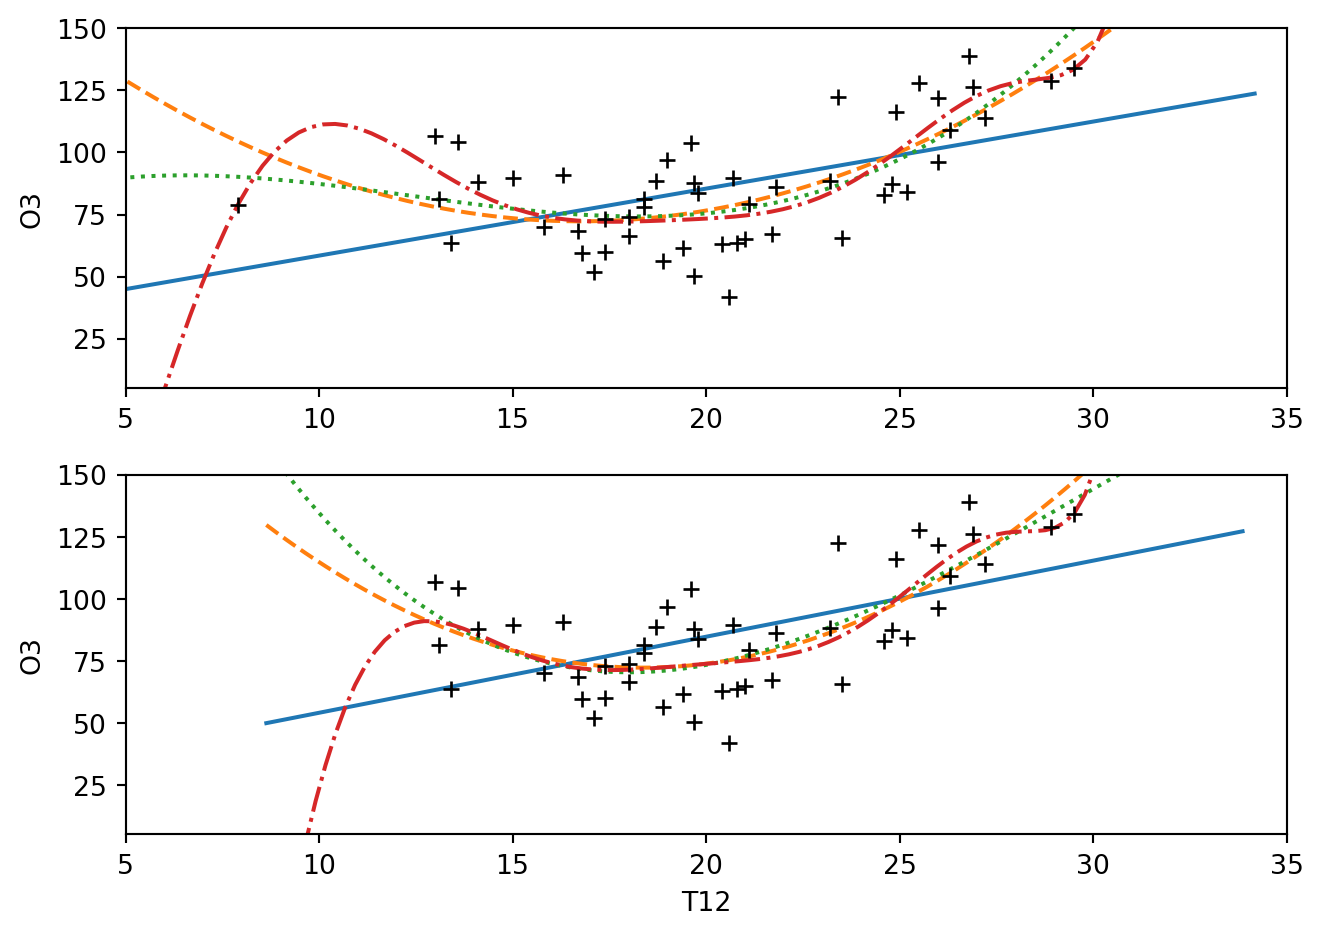

In [8]:
oz = ozone.copy()
oz = oz.loc[oz.T12!=oz.T12.min(),:]
ligne = ['-', '--', ':', '-.']
fig, (ax1, ax2) = plt.subplots(2, 1)
for iter, ii in enumerate([1,2,3,9]):
    tmp = polyreg(ozone, d=ii)
    ax1.plot(tmp["grillex"], tmp["grilley"], ls=ligne[iter])

ax1.set_ylabel("O3")
ax1.set_xlim(5,35)
ax1.set_ylim(5, 150)
ax1.plot(ozone.T12, ozone.O3, "k+")
for iter, ii in enumerate([1,2,3,9]):
    tmp = polyreg(oz, d=ii)
    ax2.plot(tmp["grillex"], tmp["grilley"], ls=ligne[iter])

ax2.set_xlabel("T12")
ax2.set_ylabel("O3")
ax2.set_xlim(5,35)
ax2.set_ylim(5, 150)
ax2.plot(oz.T12, oz.O3, "k+")
fig.tight_layout()

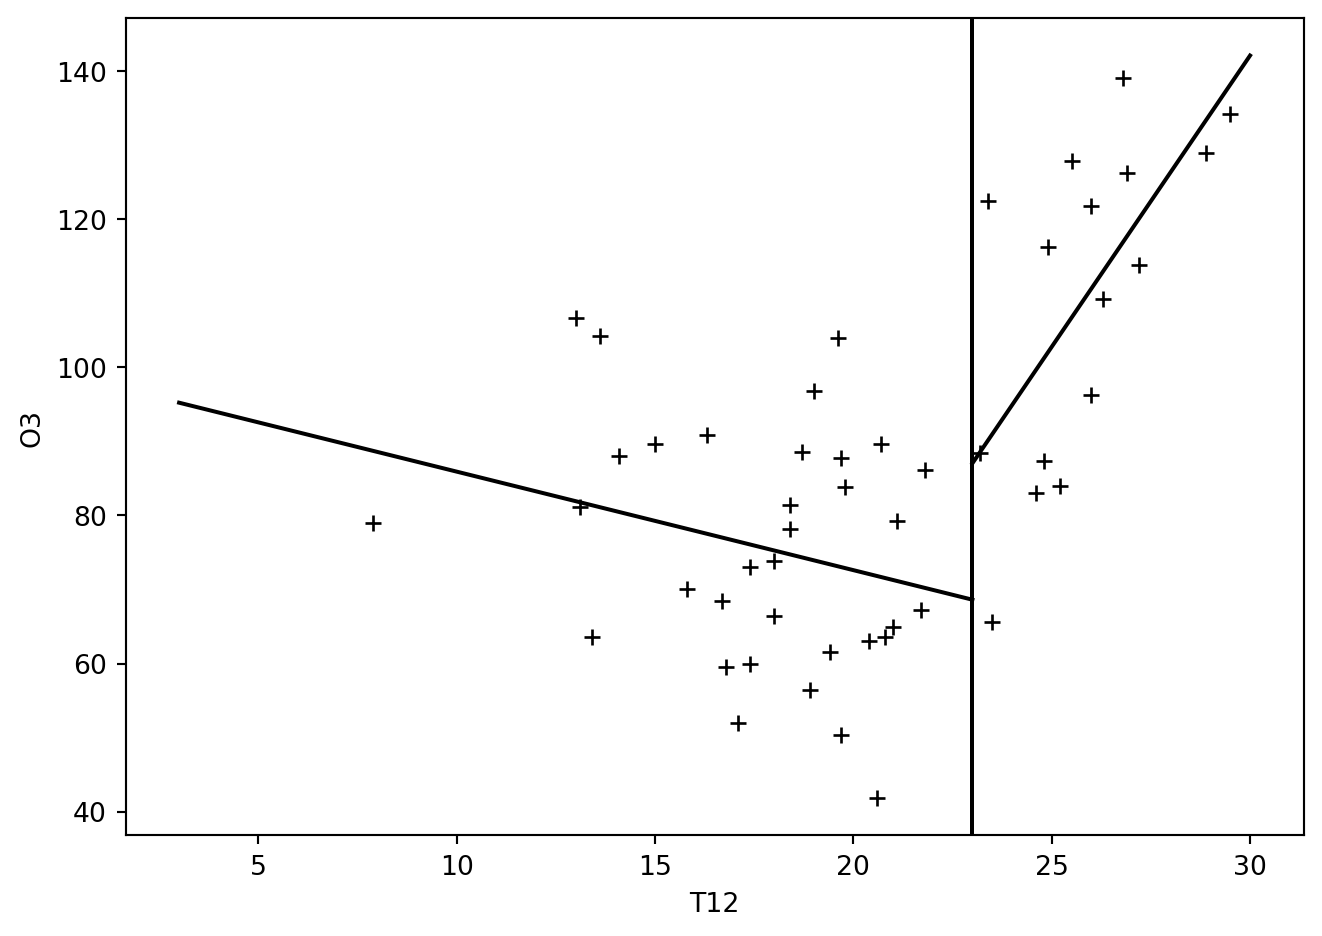

In [9]:
ind = ozone.T12 < 23
regd = smf.ols("O3~T12", data=ozone.loc[ind,:]).fit()
regf = smf.ols("O3~T12", data=ozone.loc[~ind,:]).fit()
gxd = np.linspace(3,23,21)
gxf = np.linspace(23,30,8)
prd = regd.params.iloc[0] +regd.params.iloc[1]*gxd
prf = regf.params.iloc[0] +regf.params.iloc[1]*gxf
fig, ax = plt.subplots(1, 1)
ax.plot(ozone.T12, ozone.O3, "k+", gxd, prd, "k-", gxf, prf, "k-")
ax.set_xlabel("T12")
ax.set_ylabel("O3")
ax.axvline(x=23, color="k")
fig.tight_layout()

In [10]:
xi = [15, 23]
BS = patsy.dmatrix("~ 1 + bs(T12, degree=2, knots=xi, include_intercept=False, lower_bound=5, upper_bound=32)", ozone, return_type="dataframe")
BS.columns = ["bs" + str(i+1) for i in range(5)]
df = pd.concat([ozone.O3, BS.iloc[:,1:]], axis=1)

regs = smf.ols("O3~1+bs2+bs3+bs4+bs5 ", df).fit()
print(regs.params.round(3))

Intercept     51.102
bs2           61.544
bs3            5.562
bs4           70.459
bs5          106.712
dtype: float64


In [11]:
regs = smf.ols("O3~ 1 + bs(T12, degree=2, knots=xi, include_intercept=False, lower_bound=5, upper_bound=32)", ozone).fit()
print(list(regs.params.round(3)))

[51.102, 61.544, 5.562, 70.459, 106.712]


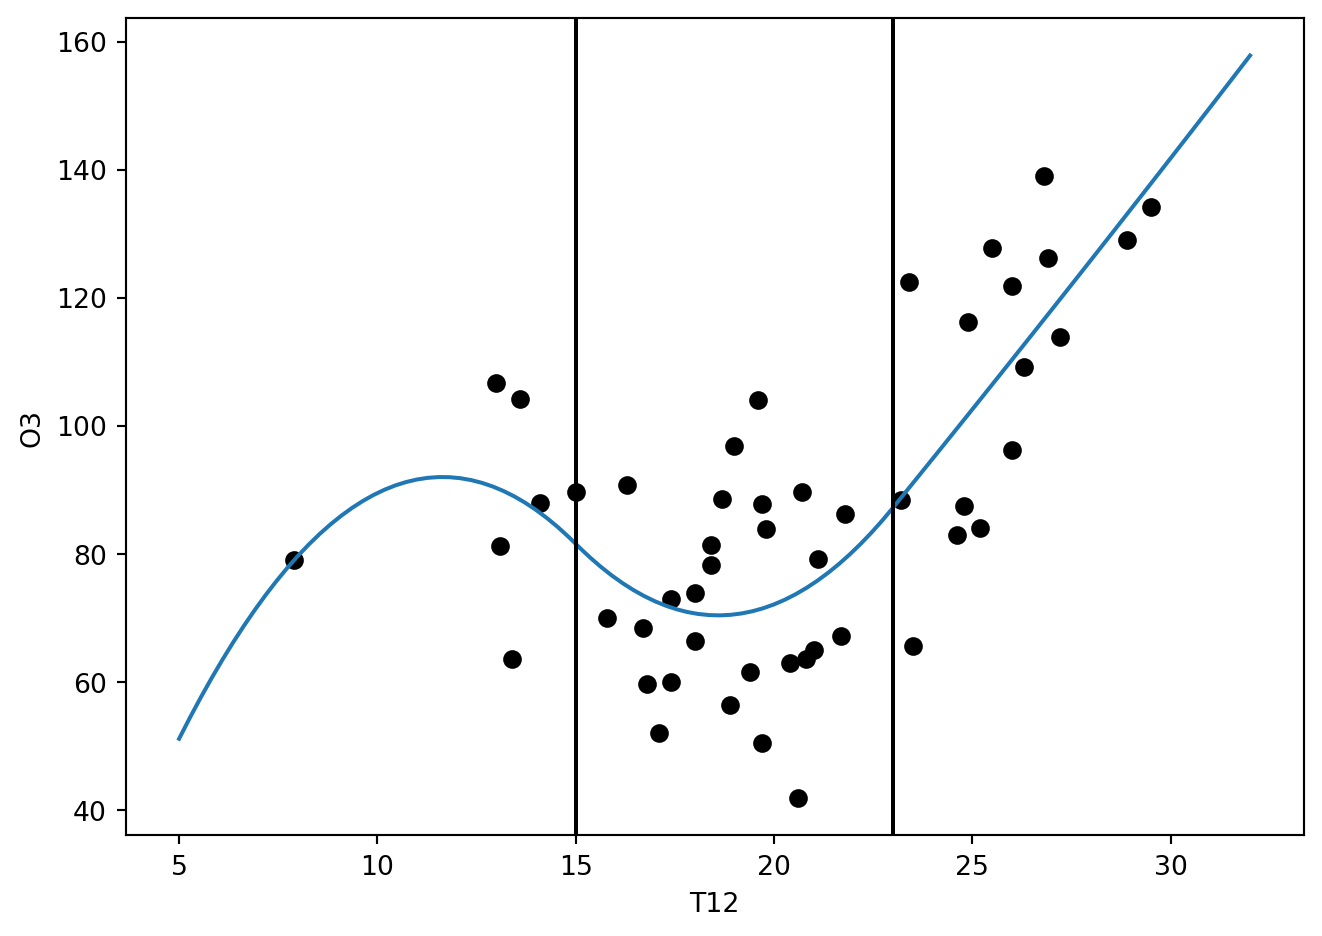

In [12]:
df = pd.DataFrame({"T12": np.linspace(5,32,100)})
prev = regs.predict(df)
fig, ax = plt.subplots(1, 1)
ax.plot(ozone.T12, ozone.O3, "ko" , df.T12, prev, "-")
ax.set_xlabel("T12")
ax.set_ylabel("O3")
ax.axvline(x=15, color="k", ls="-")
ax.axvline(x=xi[1], color="k", ls="-")
fig.tight_layout()

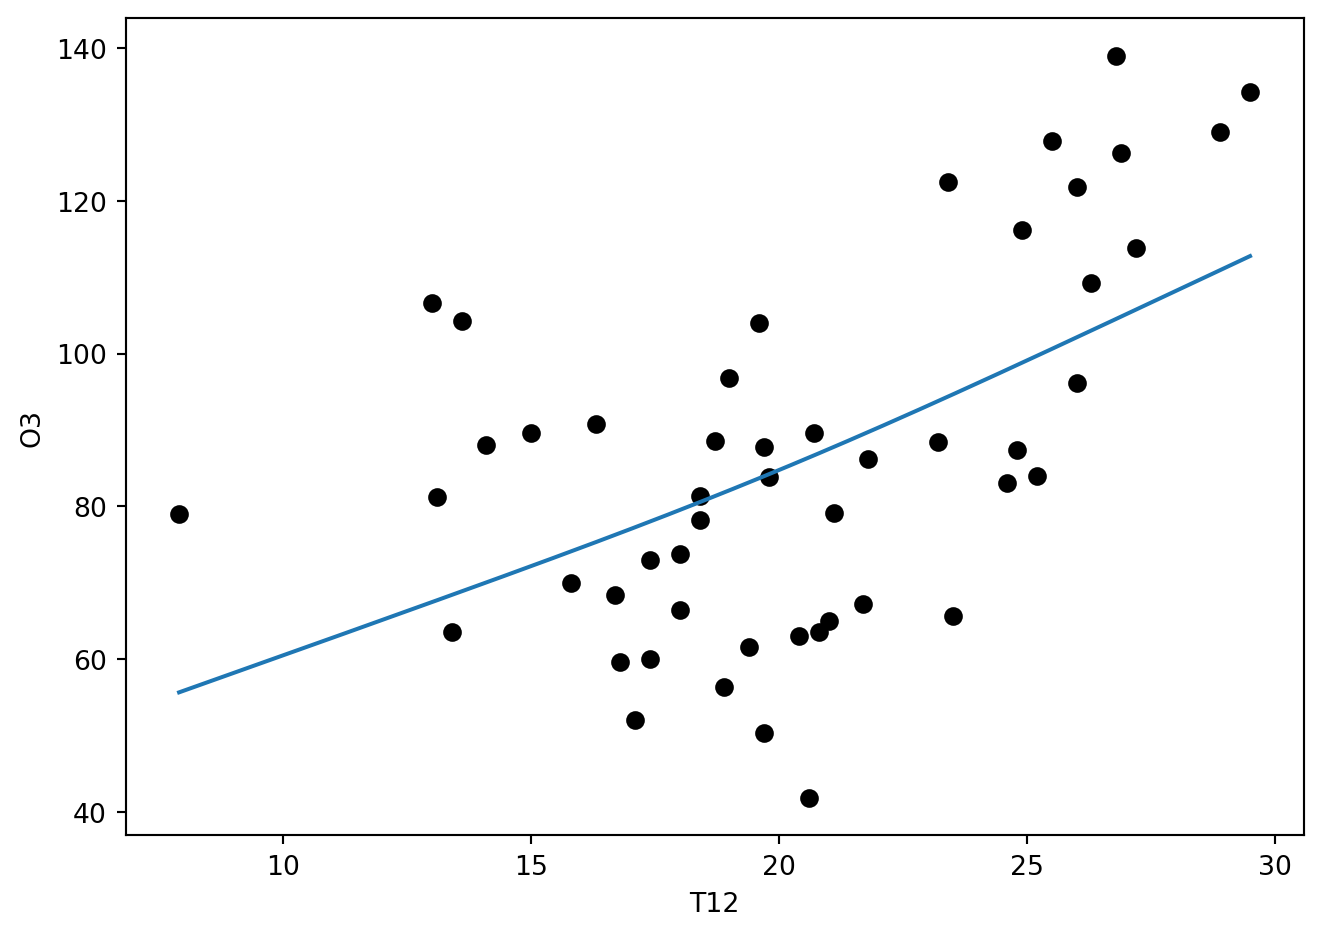

In [13]:
ozdedup = ozone.groupby("T12").mean()
ozdedup["w"] = ozone.groupby("T12").count()
spl = make_smoothing_spline(ozdedup.index, ozdedup.O3, ozdedup.w, lam=10000)
xi = np.linspace(ozdedup.index[0], ozdedup.index[-1], 150)
yi = spl(xi)
fig, ax = plt.subplots(1, 1)
ax.plot(ozone.T12, ozone.O3, "ko" , xi, yi, "-")
ax.set_xlabel("T12")
ax.set_ylabel("O3")
fig.tight_layout()

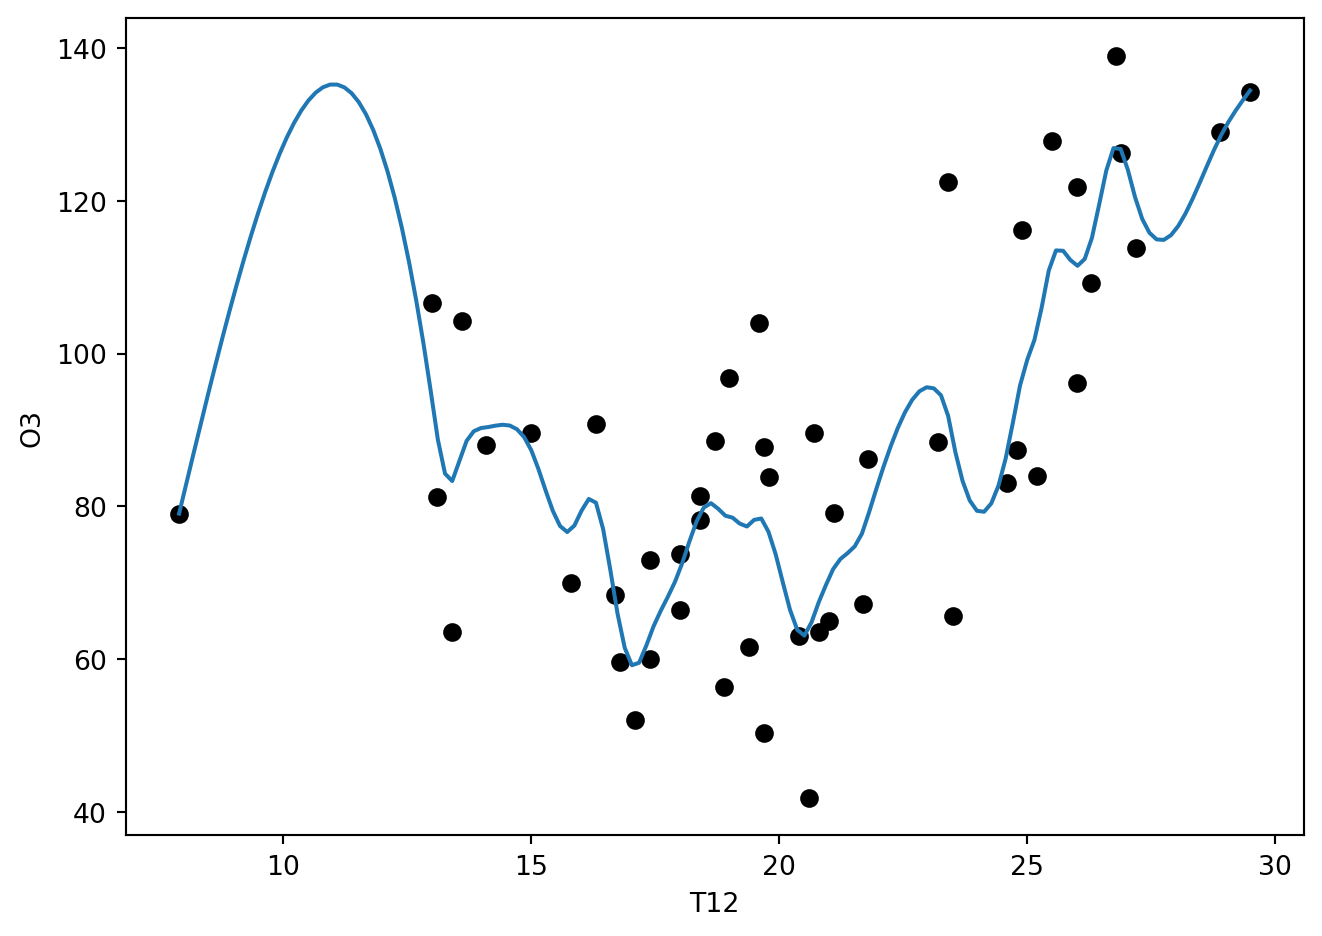

In [14]:
spl = make_smoothing_spline(ozdedup.index, ozdedup.O3, ozdedup.w, lam=1e-2)
xi = np.linspace(ozdedup.index[0], ozdedup.index[-1], 150)
yi = spl(xi)
fig, ax = plt.subplots(1, 1)
ax.plot(ozone.T12, ozone.O3, "ko" , xi, yi, "-")
ax.set_xlabel("T12")
ax.set_ylabel("O3")
fig.tight_layout()

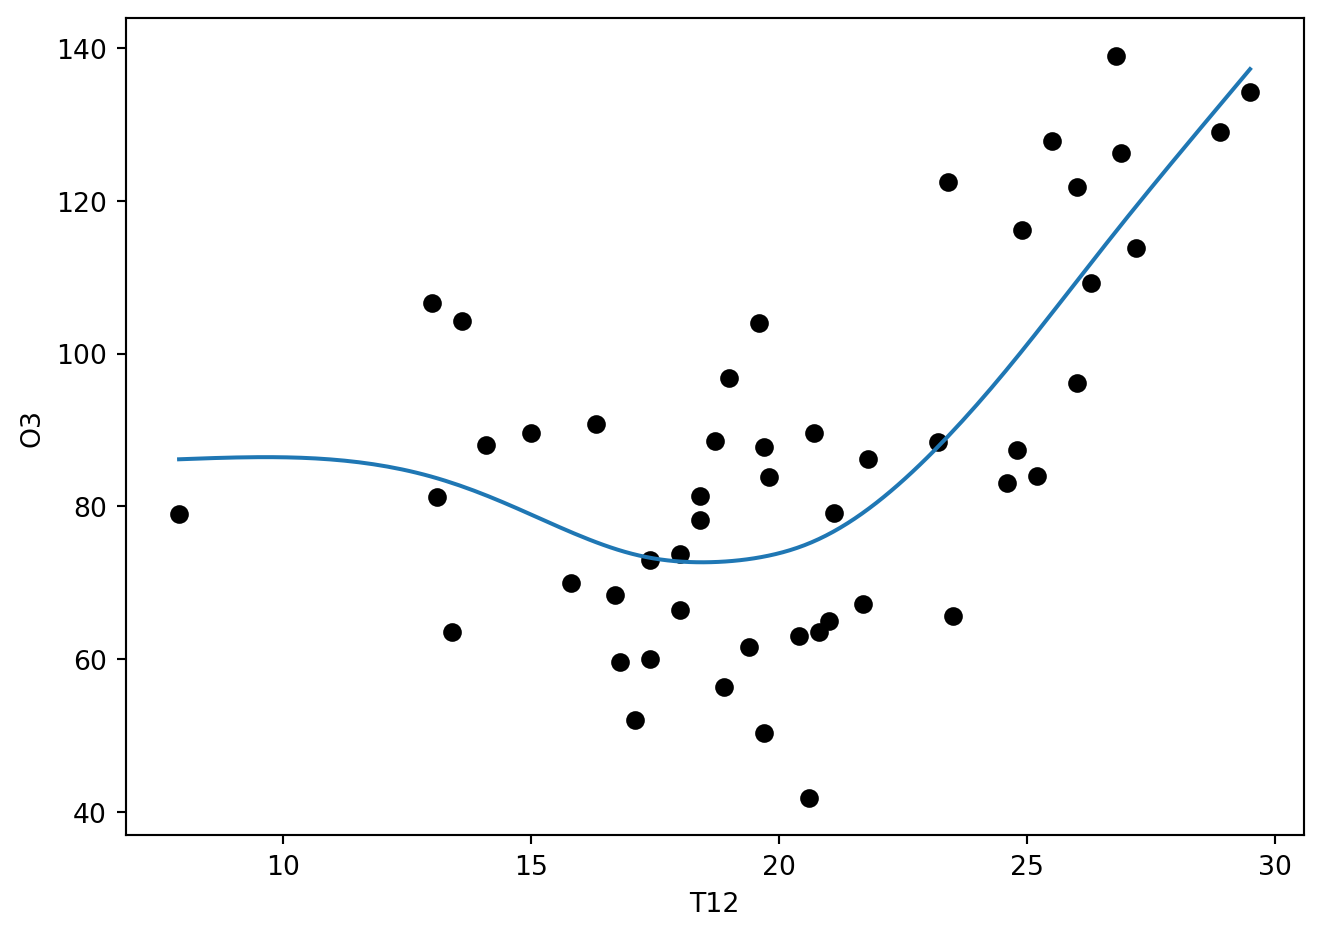

In [15]:
ozdedup = ozone.groupby("T12").mean()
ozdedup["w"] = ozone.groupby("T12").count()
spl = make_smoothing_spline(ozdedup.index, ozdedup.O3, ozdedup.w)
xi = np.linspace(ozdedup.index[0], ozdedup.index[-1], 150)
yi = spl(xi)
fig, ax = plt.subplots(1, 1)
ax.plot(ozone.T12, ozone.O3, "ko" , xi, yi, "-")
ax.set_xlabel("T12")
ax.set_ylabel("O3")
fig.tight_layout()